In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import hsmm_mvpy as hmp
from pathlib import Path
from mne.io import read_info
from hmpai.data import StageFinder, SAT1_STAGES_ACCURACY, SAT1_STAGES_SPEED, SAT2_STAGES_ACCURACY, SAT2_STAGES_SPEED, AR_STAGES
from hmpai.ica import ICA

In [2]:
# info_path = Path("../data/sat2/preprocessed_500hz/preprocessed_S1_raw.fif")
info_path = Path("../data/sat1/preprocessed/processed_0001_epo.fif")
positions = read_info(info_path)

Transforming epoched data to principal component (PC) space


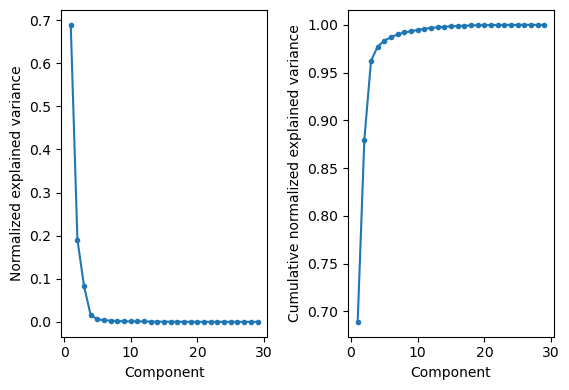

Fitting HMP model for accuracy condition
Estimating 4 events model with 100 starting point(s)


  0%|          | 0/100 [00:00<?, ?it/s]

parameters estimated for 4 events model
Fitting HMP model for speed condition
Estimating 3 events model with 100 starting point(s)


  0%|          | 0/100 [00:00<?, ?it/s]

parameters estimated for 3 events model


In [3]:
cpus = 12

epoched_data_path = Path("../data/sat2/data.nc")
output_path = Path("../data/sat2/stage_data.nc")

conditions = ["accuracy", "speed"]
labels = {"accuracy": SAT1_STAGES_ACCURACY, "speed": SAT1_STAGES_SPEED}

stage_finder = StageFinder(
    epoched_data_path,
    labels,
    conditions=conditions,
    cpus=cpus,
    fit_function="fit_single",  # n_events is extracted from the amount of labels in 'conditions' variable
    fit_args={"starting_points": 100},
    verbose=False,
    condition_variable="event_name",
    condition_method="contains",
)
stage_finder.fit_model()

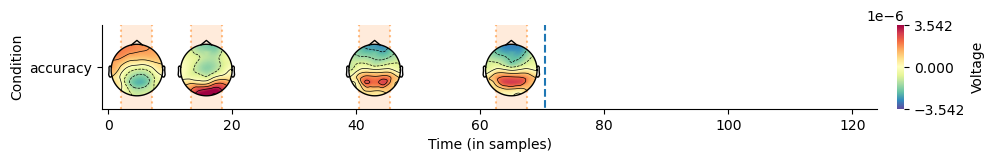

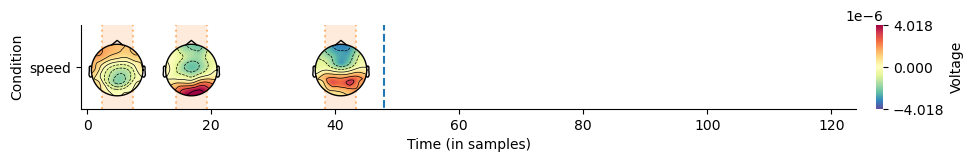

In [4]:
# Visualize model to check if fitting was done as expected

stage_finder.visualize_model(positions)

In [111]:
np.unique(stage_finder.fits[0].trial_x_participant.participant.values, return_counts=True)

(array(['S10', 'S11', 'S12', 'S13', 'S14'], dtype=object),
 array([1063,  963, 1088, 1092, 1057]))

In [122]:
stage_finder.epoch_data.epochs

<xarray.DataArray 'epochs' (epochs: 2424)>
array([   0,    1,    2, ..., 2444, 2445, 2446])
Coordinates:
  * epochs   (epochs) int64 0 1 2 3 4 5 6 ... 2440 2441 2442 2443 2444 2445 2446

In [119]:
stage_finder.fits[1].trial_x_participant[900:1100]

<xarray.DataArray 'trial_x_participant' (trial_x_participant: 200)>
array([('S10', 2017), ('S10', 2018), ('S10', 2019), ('S10', 2020),
       ('S10', 2021), ('S10', 2022), ('S10', 2024), ('S10', 2025),
       ('S10', 2026), ('S10', 2027), ('S10', 2028), ('S10', 2034),
       ('S10', 2035), ('S10', 2036), ('S10', 2038), ('S10', 2248),
       ('S10', 2250), ('S10', 2251), ('S10', 2252), ('S10', 2253),
       ('S10', 2254), ('S10', 2267), ('S10', 2268), ('S10', 2269),
       ('S10', 2270), ('S10', 2271), ('S10', 2272), ('S10', 2273),
       ('S10', 2274), ('S10', 2280), ('S10', 2281), ('S10', 2282),
       ('S10', 2283), ('S10', 2284), ('S10', 2285), ('S10', 2286),
       ('S10', 2287), ('S10', 2288), ('S10', 2289), ('S10', 2290),
       ('S10', 2291), ('S10', 2292), ('S10', 2293), ('S10', 2294),
       ('S10', 2295), ('S10', 2296), ('S10', 2297), ('S10', 2298),
       ('S10', 2299), ('S10', 2300), ('S10', 2301), ('S10', 2302),
       ('S10', 2303), ('S10', 2304), ('S10', 2305), ('S10', 2306),
       ('S10', 2307), ('S10', 2308), ('S10', 2309), ('S10', 2310),
       ('S10', 2311), ('S10', 2312), ('S10', 2313), ('S10', 2314),
       ('S10', 2315), ('S10', 2316), ('S10', 2317), ('S10', 2319),
       ('S10', 2320), ('S10', 2321), ('S10', 2322), ('S10', 2323),
       ('S10', 2324), ('S10', 2325), ('S10', 2326), ('S10', 2327),
       ('S10', 2328), ('S10', 2329), ('S10', 2330), ('S10', 2331),
       ('S10', 2332), ('S10', 2333), ('S10', 2334), ('S10', 2335),
       ('S10', 2336), ('S10', 2337), ('S10', 2338), ('S10', 2339),
       ('S10', 2340), ('S10', 2341), ('S10', 2342), ('S10', 2343),
       ('S10', 2344), ('S10', 2346), ('S10', 2347), ('S10', 2348),
       ('S10', 2349), ('S10', 2350), ('S10', 2351), ('S10', 2352),
       ('S10', 2353), ('S10', 2354), ('S10', 2355), ('S10', 2356),
       ('S10', 2357), ('S10', 2358), ('S10', 2359), ('S10', 2360),
       ('S10', 2361), ('S10', 2362), ('S10', 2363), ('S10', 2364),
       ('S10', 2365), ('S10', 2366), ('S10', 2367), ('S10', 2368),
       ('S10', 2369), ('S10', 2370), ('S10', 2371), ('S10', 2372),
       ('S10', 2373), ('S10', 2374), ('S10', 2375), ('S10', 2376),
       ('S10', 2377), ('S10', 2378), ('S10', 2382), ('S10', 2383),
       ('S10', 2384), ('S10', 2385), ('S10', 2386), ('S10', 2387),
       ('S10', 2388), ('S10', 2389), ('S10', 2390), ('S10', 2391),
       ('S10', 2392), ('S10', 2393), ('S10', 2394), ('S10', 2395),
       ('S10', 2396), ('S10', 2397), ('S10', 2398), ('S10', 2399),
       ('S10', 2400), ('S10', 2401), ('S10', 2402), ('S10', 2403),
       ('S10', 2404), ('S10', 2405), ('S10', 2406), ('S10', 2407),
       ('S10', 2408), ('S10', 2410), ('S10', 2411), ('S10', 2412),
       ('S10', 2413), ('S10', 2414), ('S10', 2415), ('S10', 2416),
       ('S10', 2417), ('S10', 2418), ('S10', 2419), ('S10', 2420),
       ('S10', 2421), ('S10', 2422), ('S10', 2423), ('S10', 2424),
       ('S10', 2425), ('S10', 2426), ('S10', 2427), ('S10', 2428),
       ('S10', 2429), ('S10', 2430), ('S10', 2431), ('S10', 2432),
       ('S10', 2433), ('S10', 2434), ('S10', 2435), ('S10', 2436),
       ('S10', 2437), ('S10', 2438), ('S10', 2439), ('S10', 2440),
       ('S10', 2441), ('S10', 2442), ('S10', 2443), ('S10', 2444),
       ('S10', 2445), ('S10', 2446), ('S11', 0), ('S11', 1), ('S11', 2),
       ('S11', 3), ('S11', 4), ('S11', 5), ('S11', 6), ('S11', 7), ('S11', 8),
       ('S11', 9)], dtype=object)
Coordinates:
  * trial_x_participant  (trial_x_participant) object MultiIndex
  * participant          (trial_x_participant) object 'S10' 'S10' ... 'S11'
  * trials               (trial_x_participant) int64 2017 2018 2019 ... 7 8 9

In [130]:
# Add labels to dataset
stage_data = stage_finder.label_model()

Labeling dataset for accuracy condition
Processing participant S10
Processing participant S11
Processing participant S12
Processing participant S13
Processing participant S14
Labeling dataset for speed condition
Processing participant S10
Processing participant S11
Processing participant S12
Processing participant S13
Processing participant S14


In [131]:
# Save labelled dataset
stage_data.to_netcdf(output_path)

In [ ]:
# Save models
hmp.utils.save_fit(stage_finder.fits[0], "100hz_accuracy.nc")
hmp.utils.save_fit(stage_finder.fits[1], "100hz_speed.nc")